# Ch03. 선형모델 - Linear model

## 학습 목표
- 선형 모델(Linear Regression)에 대해 이해해보자. $(\star\star)$

## 학습내용

- Boston 데이터 셋 불러오기
- 집값 예측 선형모델 구축해보기

- 선형회귀(linear regression)는 100여 년 전에 개발되었다.
- 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행
- 특성이 하나일 때는 **직선**, 두개일 때는 **평면**, 더 높은 차원 **초평면**(hyperplane)
- knnRegression과 비교해보면 직선이 사용한 예측이 더 제약이 있다.
- 특성이 많은 데이터 셋이라면 선형 모델은 훌륭한 성능을 갖는다.

### <font color = 'purple'>선형 회귀 모형</font>
$$ Y_i = \beta_0 + \beta_1x_{i1} + \dots + \beta_px_{ip} +\epsilon_i, \quad \epsilon_i \overset{\mathrm{iid}}{\sim} N(0, \sigma^2),\quad i=1,\dots n$$

***가정(Assumptions)***

- **선형성 (Linearity)** : 평균 반응 $E(Y|X=x)$과 설명변수 선형관계



- **독립성 (Independence)** : $Y_1, Y_2, \dots, Y_n$이 서로 독립
    - $f(y_1,y_2,\dots,y_n|x_1,x_2,\dots,x_n) = f(y_1|x_1)f(y_2|x_2)\dots f(y_n|x_n)$



- **정규성 (Normality)** : $Y$의 분포가 정규분포, $Y|X = x\sim Normal$



- **등분산성 (Equal variance)** : $Y$의 분산 동일, $Var(Y|X=x) = \sigma^2$

### <font color = 'purple'>LS method</font>

> $$S(\beta_0, \beta_1, \dots, \beta_p) := \sum_{i=1}^n[Y_i - (\beta_0+\beta_1x_{i1}+\dots+\beta_px_{ip})]^2$$
> $\hat{\beta}_0,\hat{\beta}_1,\dots,\hat{\beta}_p$를 최소로 하는 $\beta_0, \beta_1, \dots, \beta_p$



- 반응변수의 적합치 : $\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1x_{i1} + \dots + \hat{\beta}_px_{ip}$

- 잔차(Residual) 또는 추정된 오차: $e_i = Y_i - \hat{Y}_i$

- 오차의 분산 추정량 : $\hat{\sigma}^2 = \sum e_i^2/(n-p-1)$

### <font color = 'purple'>선형 회귀 모형의 추정</font>

추정된 회귀 모형의 적합도

**결정계수 (coefficient of determinant)**
$$R^2 = \frac{\sum_{i=1}^n (\hat{Y}_i - \bar{Y})^2}{\sum_{i=1}^n (Y_i - \bar{Y})^2} = \frac{SS_{reg}}{SST} = \frac{회귀제곱합}{총제곱합}$$



- 회귀제곱합 : 추정된 회귀모형상의 $i$번째 반응변수 값, $\hat{Y}_i$와 실제 관측된 $Y_i$들의 평균 $\bar{Y}$의 편차 제곱합

- 총제곱합 : 실제 관측된 $Y_i$와 $\bar{Y}$의 편차 제곱합

- $0 \leq R^2 \leq 1$

- 단순 선형 회귀 모형의 경우 $R^2 = \text{상관계수제곱}$

## 01. 선형 회귀 모델 그래프로 살펴보기

특성이 하나일 때의 선형 함수

w[0]: 0.393906  b: -0.031804


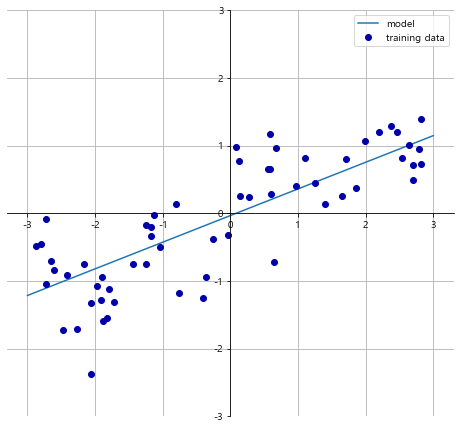

In [2]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

### 02. Boston 데이터 셋을 활용한 회귀 모델 만들어보기

`-` 데이터 설명
- 1970년대의 보스턴 주변의 주택 평균 가격 예측
- 506개의 데이터 포인트와 13개의 특성

```
(1) 모델 만들기 [ 모델명 = 모델객체 ]

(2) 모델 학습시키기 [ 모델명.fit() ]

(3) 모델을 활용한 예측하기 [ 모델명.predict() ]

(4) 모델 평가
```

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [54]:
boston = load_boston()
X = boston.data
y = boston.target

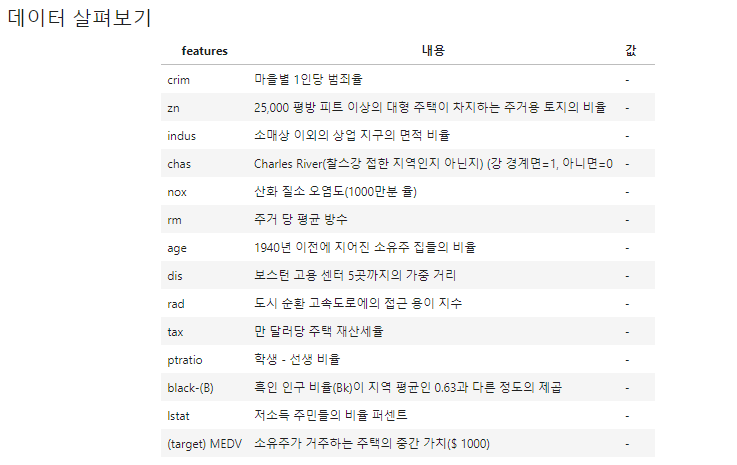

In [12]:
type(boston)

sklearn.utils._bunch.Bunch

- type이 bunch인 경우 head(), tail()로 접근할 수 없다.
- 딕셔너리와 같이 .keys(), .values()로 접근 가능

In [17]:
print(boston.keys())
print('--'*40)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
--------------------------------------------------------------------------------
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [55]:
# 01. 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 02. 모델 생성
model = LinearRegression()

# 03. 모델 학습
model.fit(X_train ,y_train)

# 04. 모델 예측
pred = model.predict(X_test) 
print(pred)

[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147448 18.

In [56]:
# 05. MSE 구하기
import numpy as np
print("MSE = ", np.mean((y_test - pred)**2))

MSE =  29.782245092302237


In [57]:
dict_df = {"실제값":y_test, "예측값":pred, "오차":y_test-pred}
df = pd.DataFrame(dict_df)
df

,실제값,예측값,오차
0,22.6,24.952333,-2.352333
1,50.0,23.616997,26.383003
2,23.0,29.205886,-6.205886
3,8.3,11.960705,-3.660705
4,21.2,21.333620,-0.133620
...,...,...,...
122,19.4,17.538048,1.861952
123,21.2,21.502223,-0.302223
124,20.3,23.632813,-3.332813
125,18.8,20.282598,-1.482598


### 평가지표

- MSE 
- MAE
- RMSE
- RMSLE

In [65]:
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [69]:
# 05. MSE 구하기
print("MSE = ", np.mean((y_test - pred)**2))
print("MSE = ", mean_squared_error(y_test, pred))

MSE =  29.782245092302237
MSE =  29.782245092302237
